In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('/content/spam.tsv', sep='\t')

In [107]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [108]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [109]:
len(df)

5572

In [110]:
#checking for spam and ham messages
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [111]:
##balance the data
ham = df[df['label'] == 'ham']
ham.head()


,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [112]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [113]:
#checking for spam and ham messages
df['label'].value_counts()

##balance the data
ham = df[df['label'] == 'ham']
ham.head()

spam = df[df['label'] == 'spam']
spam.head()

# Access the shape attribute using dot notation
ham.shape, spam.shape # corrected line: removed parentheses

((4825, 4), (747, 4))

In [114]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [115]:
data = pd.concat([ham,spam], ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


#Exploratory Data Analysis

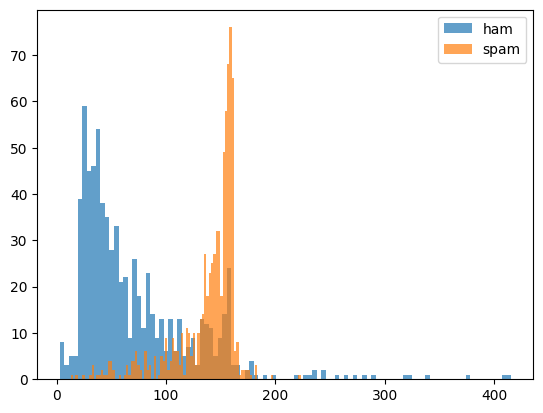

In [116]:
#plot for the length
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.legend(['ham', 'spam'])
plt.show()

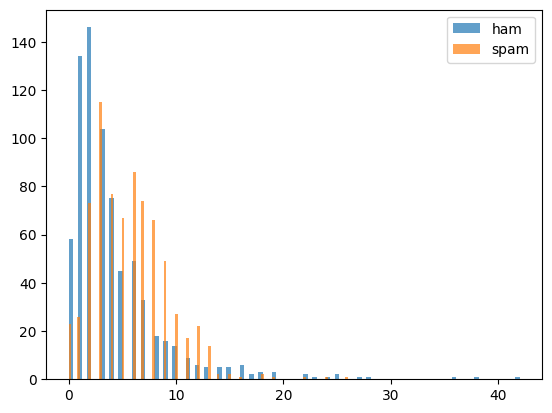

In [117]:
#plot for a punctuation
plt.hist(data[data['label'] == 'ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100, alpha=0.7)
plt.legend(['ham', 'spam'])
plt.show()

#Data Preparation

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [119]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [120]:

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle = True, stratify=data['label'])


In [121]:
X_train

,message
1128,U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742,Have a good evening! Ttyl
477,K:)k:)what are detail you want to transfer?acc...
542,Ok enjoy . R u there in home.
1277,Ringtone Club: Gr8 new polys direct to your mo...
...,...
1211,Bloomberg -Message center +447797706009 Why wa...
312,Gud mrng dear have a nice day
268,Havent.
272,Hi ....My engagement has been fixd on &lt;#&g...


In [122]:
y_train

,label
1128,spam
742,ham
477,ham
542,ham
1277,spam
...,...
1211,spam
312,ham
268,ham
272,ham


In [123]:
#Bag of word creation
#vectorizer = TfidfVectorizer()
#X_train = vectorizer.fit_transform(X_train)
#X_train.shape

In [124]:
X_train

,message
1128,U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742,Have a good evening! Ttyl
477,K:)k:)what are detail you want to transfer?acc...
542,Ok enjoy . R u there in home.
1277,Ringtone Club: Gr8 new polys direct to your mo...
...,...
1211,Bloomberg -Message center +447797706009 Why wa...
312,Gud mrng dear have a nice day
268,Havent.
272,Hi ....My engagement has been fixd on &lt;#&g...


#Pipeline and Random Forest Classifier

In [125]:
clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [126]:
#Bag of word creation
# Commenting out the below lines to avoid pre-processing before Pipeline
# vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(X_train)
# X_train.shape

clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
# Fitting the Pipeline with original(raw text) X_train
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [127]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[219,   6],
       [ 29, 195]])

In [128]:
#check accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.97      0.93       225
        spam       0.97      0.87      0.92       224

    accuracy                           0.92       449
   macro avg       0.93      0.92      0.92       449
weighted avg       0.93      0.92      0.92       449



In [129]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.9220489977728286


In [130]:
#predict a real msg
clf.predict(['Hi, How are you?'])

array(['ham'], dtype=object)

In [131]:
clf.predict(["Hi this is Brian"])

array(['ham'], dtype=object)

In [132]:
#create a spam msg
clf.predict(["URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD PO"])

array(['spam'], dtype=object)

#Support Vector Machine

In [137]:
clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', SVC(C=1000, gamma= 'auto'))])
clf.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [138]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[216,   9],
       [ 17, 207]])

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.96      0.94       225
        spam       0.96      0.92      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [140]:
accuracy_score(y_test, y_pred)

0.9420935412026726

In [142]:
clf.predict(['Hi, How are you?'])

array(['ham'], dtype=object)

In [144]:
clf.predict(["Hi this is Brian the one who has won a lottery for this summer"])

array(['spam'], dtype=object)